In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import simulation
import time

import importlib
_ = importlib.reload(simulation)

In [2]:
def analytical(k, lmbda):
    return lmbda /(np.sqrt(np.pi) * k**(3/2)) * np.exp(-lmbda**2 * k)

In [38]:
sim = simulation.NaiveSimulation(num_equations=100, dt=0.01, lmbda=0.01, alpha=0.5)
fast_sim = simulation.FastSimulation(num_equations=100, dt=0.01, lmbda=0.01, alpha=0.5)

In [39]:
sresults = sim.run_simulation(1000)
fast_results = fast_sim.run_simulation(1000)

C:\Users\Aleksei\Documents\Skoltech\kinetics\project\simulation.py:87: RuntimeWarning: divide by zero encountered in true_divide
  K = (iss / js)**self.alpha + (js / iss)**self.alpha
C:\Users\Aleksei\Documents\Skoltech\kinetics\project\simulation.py:87: RuntimeWarning: invalid value encountered in true_divide
  K = (iss / js)**self.alpha + (js / iss)**self.alpha


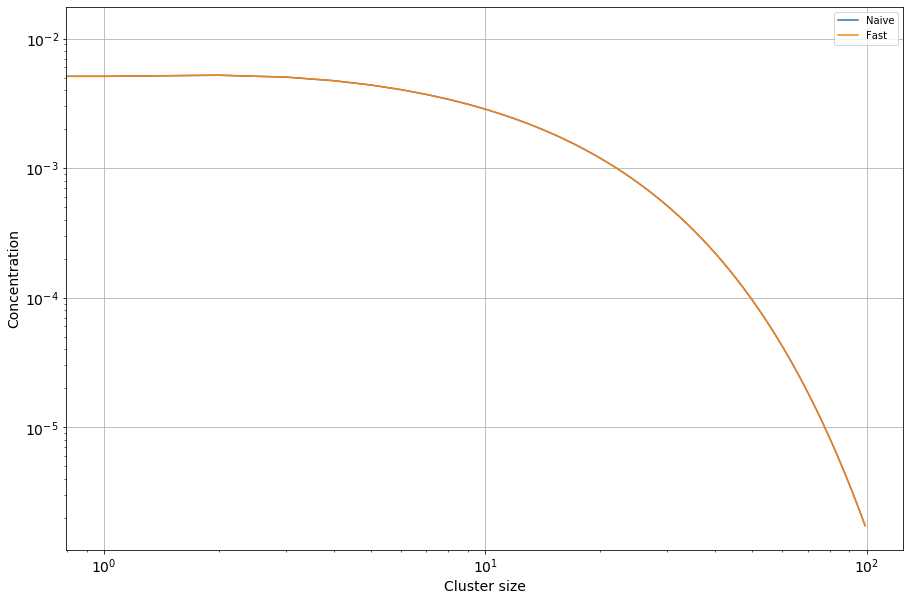

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.loglog(sresults[1:], label='Naive')
ax.loglog(fast_results[1:], label='Fast')
ax.set_xlabel('Cluster size', fontsize=14)
ax.set_ylabel('Concentration', fontsize=14)
ax.legend()
ax.grid()
# ax.set_title('Steady-state solution of the aggregation model', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

c:\program files\python 3.6\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


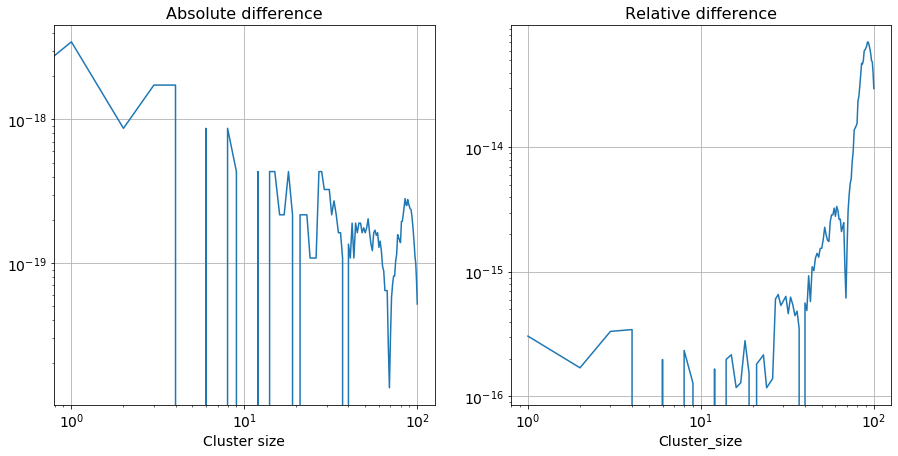

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].loglog(np.abs(sresults - fast_results))
axes[1].loglog(np.abs(sresults - fast_results)/np.abs(fast_results))
# fig.suptitle('Error of approximation between naive and fast solver', fontsize=18)
axes[0].set_title('Absolute difference', fontsize=16)
axes[1].set_title('Relative difference', fontsize=16)
axes[0].set_xlabel('Cluster size', fontsize=14)
axes[1].set_xlabel('Cluster_size', fontsize=14)
axes[0].grid()
axes[1].grid()
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].tick_params(axis='both', which='minor', labelsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='minor', labelsize=14)

In [376]:
fast_sim = simulation.FastSimulation(num_equations=50000, dt=0.005, lmbda=0.01, alpha=0.2)

In [377]:
k = np.arange(1, 50000)
anal = analytical(k, 0.01)

In [378]:
np.seterr(over='print', under='print')
fast_results = fast_sim.run_simulation(50000)

Text(0.5, 1.0, 'Steady-state solution of the aggregation model')

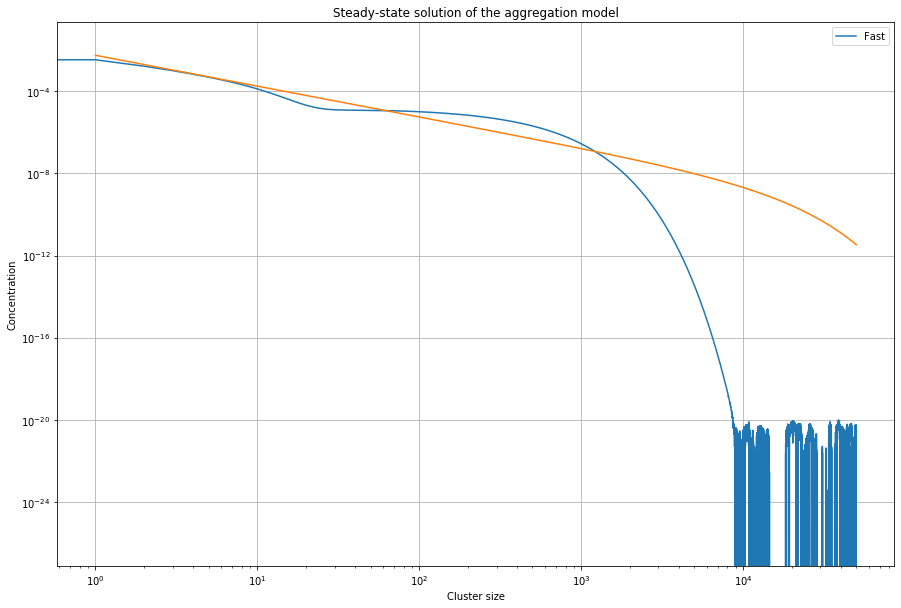

In [379]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.loglog(fast_results[1:], label='Fast')
ax.loglog(k, anal)
ax.set_xlabel('Cluster size')
ax.set_ylabel('Concentration')
ax.legend()
ax.grid()
ax.set_title('Steady-state solution of the aggregation model')

In [408]:
fast_sim01 = simulation.FastSimulation(num_equations=150000, dt=0.005, lmbda=0.005, alpha=0.1)

In [409]:
k = np.arange(1, 150001)
anal = analytical(k, 0.005)

In [410]:
start = time.time()
np.seterr(over='print', under='print')
fast_results01 = fast_sim01.run_simulation(150000)
print(time.time() - start)

4821.821424484253


Text(0.5, 1.0, 'Steady-state solution of the aggregation model')

c:\program files\python 3.6\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


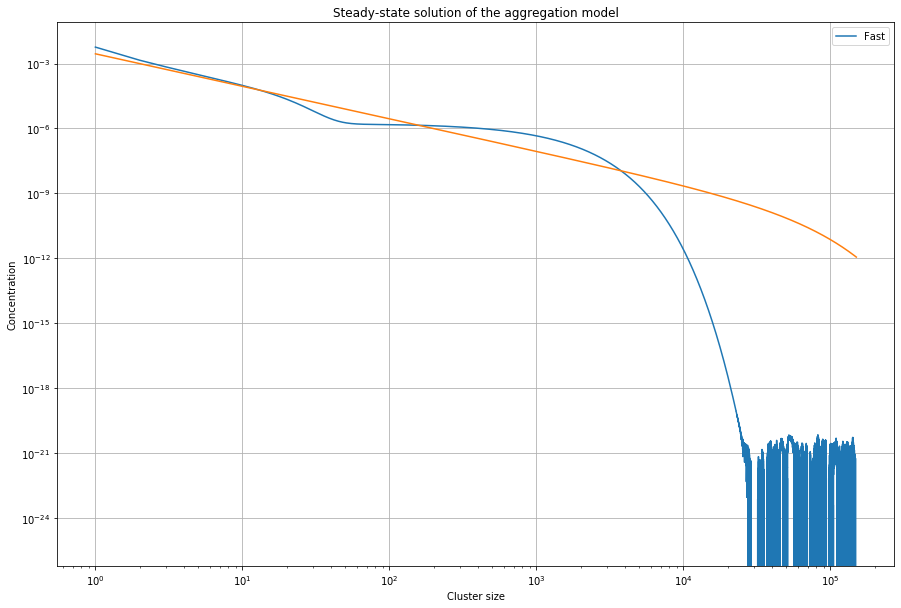

In [411]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.loglog(k, fast_results01[1:], label='Fast')
ax.loglog(k, anal)
ax.set_xlabel('Cluster size')
ax.set_ylabel('Concentration')
ax.legend()
ax.grid()
ax.set_title('Steady-state solution of the aggregation model')

In [3]:
fast_sim01 = simulation.FastSimulation(num_equations=15000, dt=0.005, lmbda=0.005, alpha=0.1)

In [4]:
k = np.arange(1, 15001)
anal = analytical(k, 0.005)

In [8]:
start = time.time()
np.seterr(over='print', under='print')
results = np.copy(fast_sim01.run_simulation(15000 * 100))
print(time.time() - start)

1691.4759452342987


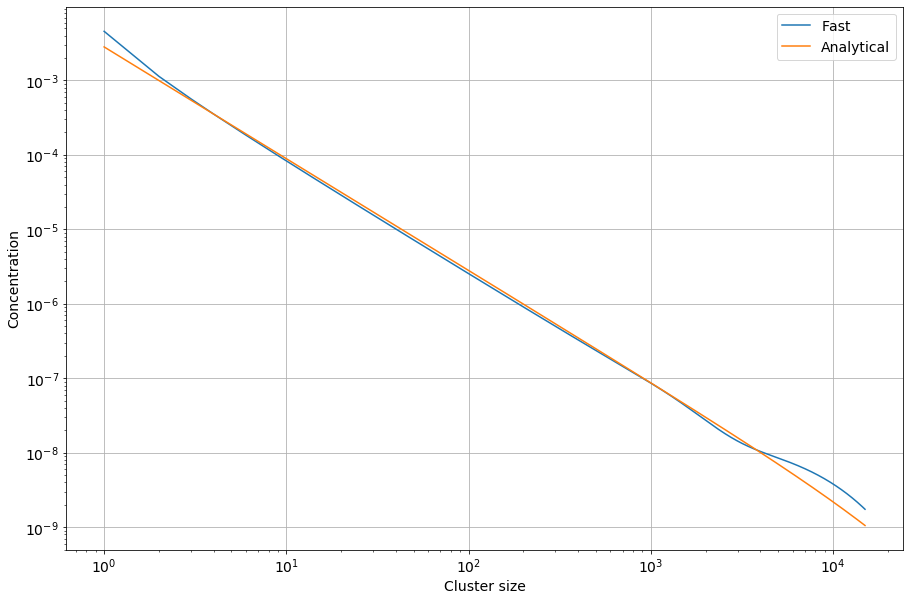

In [9]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.loglog(k, results[1:], label='Fast')
ax.loglog(k, anal, label='Analytical')
ax.set_xlabel('Cluster size', fontsize=14)
ax.set_ylabel('Concentration', fontsize=14)
ax.legend(fontsize=14)
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_title('Steady-state solution of the aggregation model')

In [12]:
np.save('res_15000_a=0.1_dt=0.005_l=0.005', results[-1])

# Time computation

In [464]:
equations_range = np.hstack([10**np.arange(1, 3), 5 * 10**np.arange(1, 2), 2 * 10**np.arange(1, 3)])
equations_range.sort()
equations_range
times = []
# fast_times = []

for num_equations in equations_range:
    sim = simulation.NaiveSimulation(num_equations=num_equations, dt=0.01, lmbda=0.01, alpha=0.5)
#     fast_sim = simulation.FastSimulation(num_equations=num_equations, dt=0.01, lmbda=0.01, alpha=0.5)
    
    start = time.time()
    _ = sim.run_simulation(1000)
    middle = time.time()
#     _ = fast_sim.run_simulation(1000)
#     end = time.time()
    times.append(middle - start)
#     fast_times.append(end - middle)

C:\Users\Aleksei\Documents\Skoltech\kinetics\project\simulation.py:87: RuntimeWarning: divide by zero encountered in true_divide
  K = (iss / js)**self.alpha + (js / iss)**self.alpha
C:\Users\Aleksei\Documents\Skoltech\kinetics\project\simulation.py:87: RuntimeWarning: invalid value encountered in true_divide
  K = (iss / js)**self.alpha + (js / iss)**self.alpha


In [80]:
equations_range = np.hstack([10**np.arange(1, 5), 5 * 10**np.arange(1, 4), 2 * 10**np.arange(1, 4)])
equations_range.sort()

NameError: name 'times' is not defined

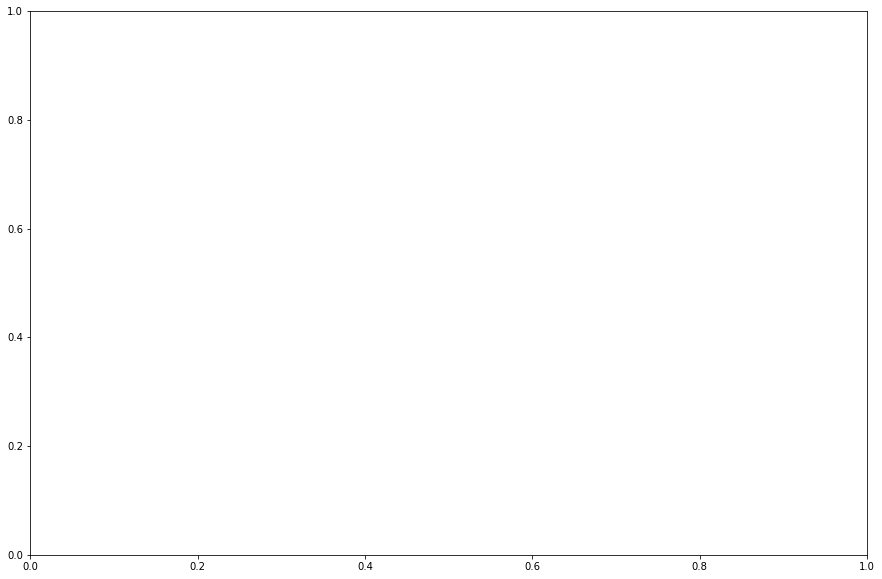

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.loglog(equations_range[:len(times)], times, label='Naive')
ax.loglog(equations_range, fast_times, label='Fast')
# ax.set_title('Comparison of running times for naive and fast solvers, 1000 iters')
ax.set_xlabel('Number of equations', fontsize=14)
ax.set_ylabel('Time, s', fontsize=14)
ax.legend(fontsize=14)
ax.grid()
axes.tick_params(axis='both', which='major', labelsize=14)
axes.tick_params(axis='both', which='minor', labelsize=14)

In [82]:
times

NameError: name 'times' is not defined

In [448]:
equations_range

array([  10,   20,   50,  100,  200,  500, 1000], dtype=int32)

In [466]:
fast_times

[0.20256567001342773,
 0.1935882568359375,
 0.2480001449584961,
 0.2287154197692871,
 0.22014713287353516,
 0.2998032569885254,
 0.32414865493774414,
 0.43378400802612305,
 0.8477458953857422,
 1.5307941436767578]

# Constant source simulation

In [92]:
def const_analytical(k, alpha):
    return np.sqrt((1 - 4*alpha**2) * np.cos(np.pi * alpha) /(4 * np.pi)) * k**(-3/2)

In [93]:
const_source_sim = simulation.ConstantSourceSimulation(num_equations=100000, dt=0.01, alpha=0.3)

In [96]:
const_results = const_source_sim.run_simulation(15000) # 30000 iterations in total

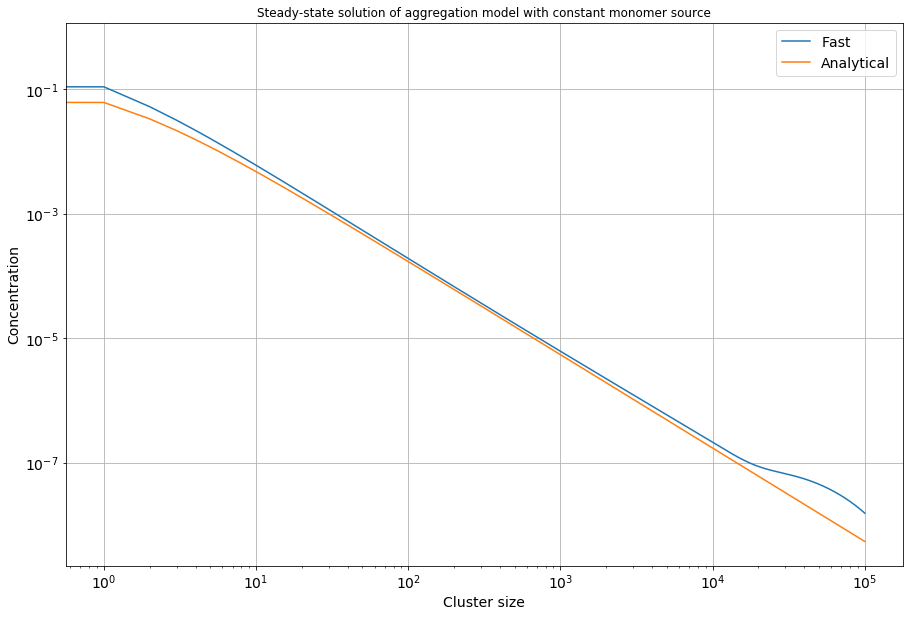

In [98]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Steady-state solution of aggregation model with constant monomer source')
ax.loglog(const_results[1:], label='Fast')
ax.loglog(const_analytical(np.arange(1, 100000), 0.3), label='Analytical')
ax.set_xlabel('Cluster size', fontsize=14)
ax.set_ylabel('Concentration', fontsize=14)
ax.grid()
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

# $\alpha < 0.5 \to \alpha > 0.5$ 

In [528]:
small_alpha_result = np.copy(results[17])

In [538]:
fast_sim = simulation.FastSimulation(num_equations=1000, dt=0.005, lmbda=0.005, alpha=0.7)

In [539]:
start = time.time()
np.seterr(over='print', under='print')
big_results =  []
for i in range(5):
    big_results.append(np.copy(fast_sim.run_simulation(50000)))
print(time.time() - start)

79.93311405181885


In [543]:
anal_ocs = analytical(np.arange(1, 1001), 0.005)

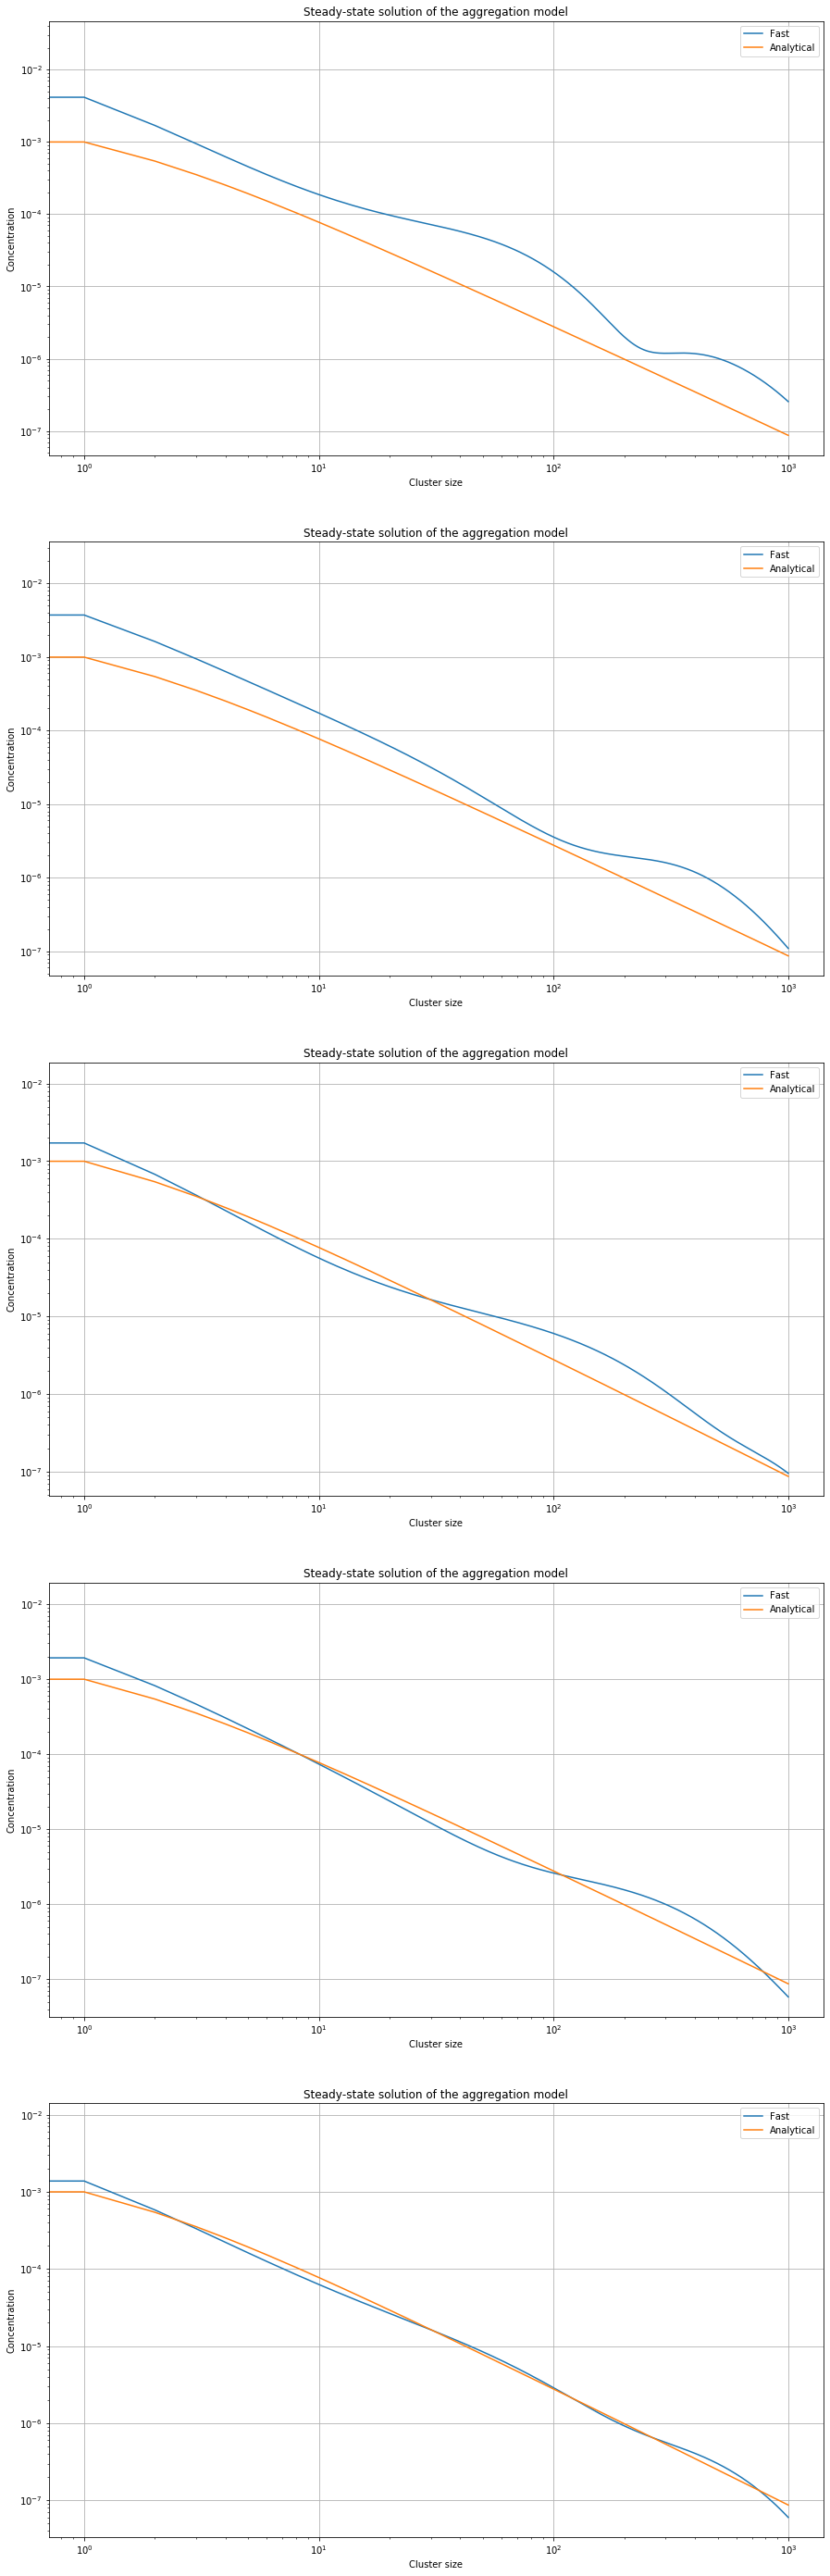

In [546]:
fig, axes = plt.subplots(len(big_results), figsize=(15, 10*len(big_results)))
for i, ax in enumerate(axes):
    ax.loglog(big_results[i][1:], label='Fast')
#     ax.loglog(anal_ocs, label='Analytical')
    ax.set_xlabel('Cluster size')
    ax.set_ylabel('Concentration')
    ax.legend()
    ax.grid()
    ax.set_title('Steady-state solution of the aggregation model')

# Oscilations

In [29]:
osc_sim = simulation.FastSimulation(num_equations=5000, dt=0.001, lmbda=0.005, alpha=0.7)
cons =  []
seconds = []

In [31]:
num_iterations = 5000
ksq = np.arange(0, 5001)**2
ts = np.arange(num_iterations) * 0.5
start = time.time()
for i in range(num_iterations):
    conc = osc_sim.run_simulation(100)
    cons.append(np.sum(conc))
    seconds.append(ksq @ conc)
print(time.time() - start)

245.77653050422668


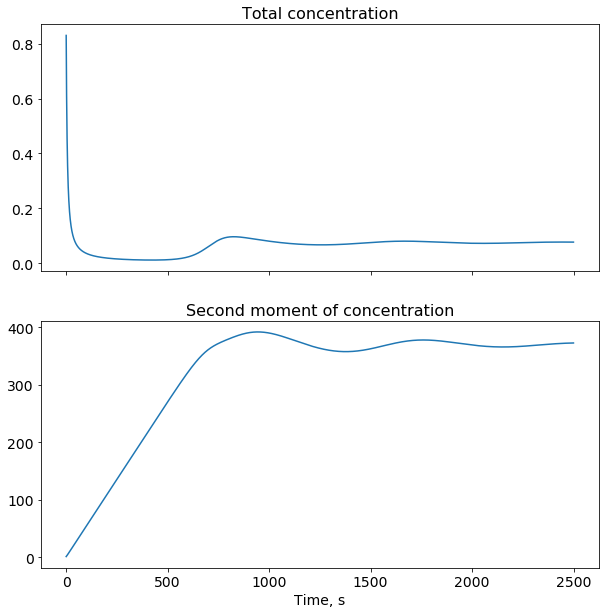

In [89]:
fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True)
ax[0].plot(ts, cons)
ax[0].set_title('Total concentration', fontsize=16)
ax[1].plot(ts, seconds)
ax[1].set_title('Second moment of concentration', fontsize=16)
ax[1].set_xlabel('Time, s', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].tick_params(axis='both', which='minor', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='minor', labelsize=14)

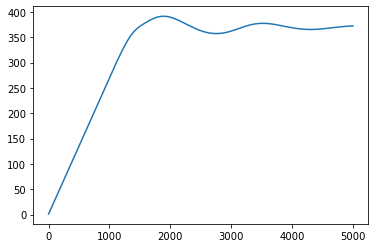

In [61]:
plt.plot(seconds)

# Const many iters

In [585]:
const_source_sim = simulation.ConstantSourceSimulation(num_equations=1000, dt=0.01, alpha=0.3)
const_cons = []
const_seconds = []

In [586]:
num_iterations = 300000
ksq = np.arange(0, 1001)**2
ts = np.arange(num_iterations) * 0.001
start = time.time()
for i in range(num_iterations):
    conc = const_source_sim.run_simulation(1)
    const_cons.append(np.sum(conc))
    const_seconds.append(ksq @ conc)
print(time.time() - start)

92.85409450531006


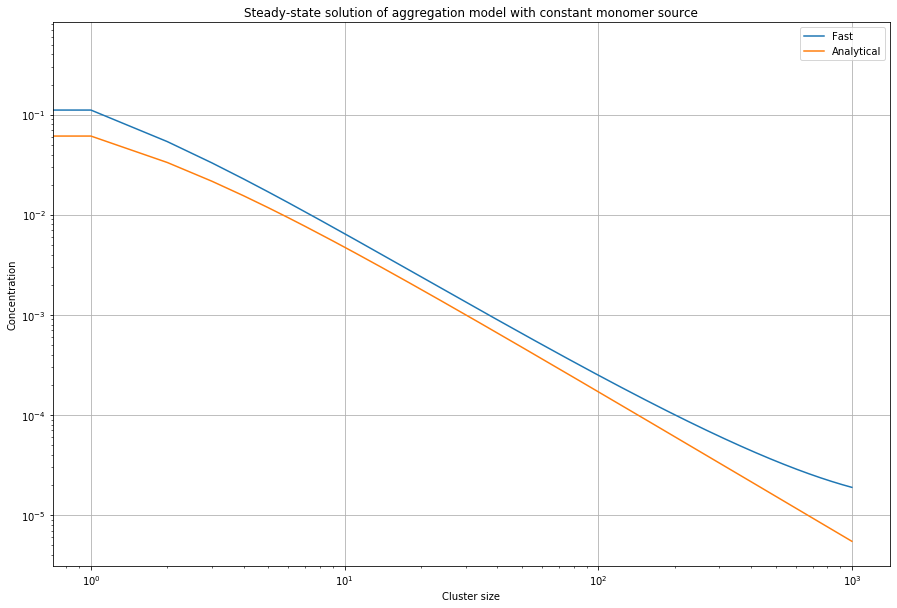

In [588]:
const_small_results = const_source_sim.concentration
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Steady-state solution of aggregation model with constant monomer source')
ax.loglog(const_small_results[1:], label='Fast')
ax.loglog(const_analytical(np.arange(1, 1001), 0.3), label='Analytical')
ax.set_xlabel('Cluster size')
ax.set_ylabel('Concentration')
ax.grid()
ax.legend()

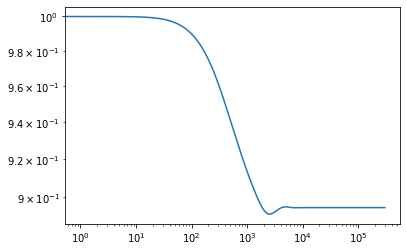

In [692]:
plt.loglog(const_cons)

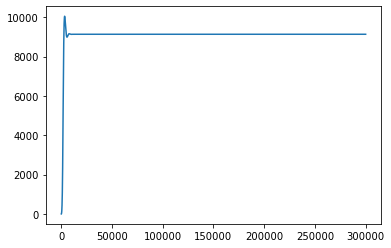

In [590]:
plt.plot(const_seconds)

# $\alpha < 0.5$

In [691]:
plt.plot(results)

15001

In [672]:
small_sim = simulation.FastSimulation(num_equations=15000, dt=0.005, lmbda=0.005, alpha=0.1)
small_cons =  []
small_seconds = []

In [684]:
num_iterations = 100000
ksq = np.arange(0, 5001)**2
ts = np.arange(num_iterations) * 0.001
start = time.time()
for i in range(num_iterations):
    conc = small_sim.run_simulation(5)
    small_cons.append(np.sum(conc))
    small_seconds.append(ksq @ conc)
print(time.time() - start)

524.4620814323425


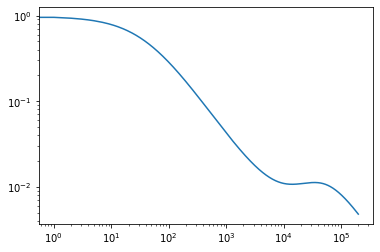

In [685]:
plt.loglog(small_cons)

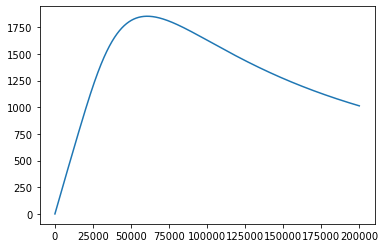

In [686]:
plt.plot(small_seconds)

In [694]:
k = np.arange(1, 15001)
anal = analytical(k, 0.005)
small_results = small_sim.concentration

Text(0.5, 1.0, 'Steady-state solution of the aggregation model')

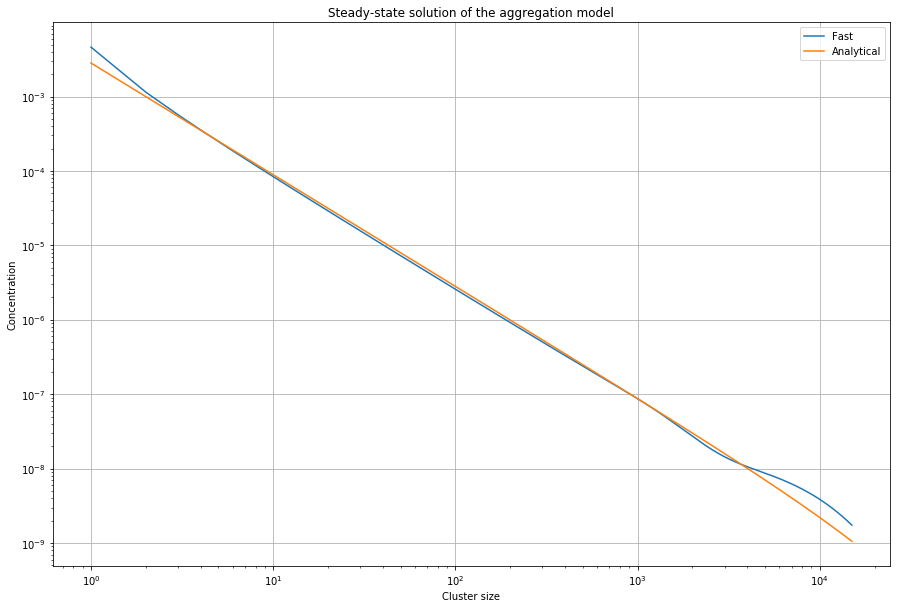

In [695]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.loglog(k, results[17][1:], label='Fast')
ax.loglog(k, anal, label='Analytical')
ax.set_xlabel('Cluster size')
ax.set_ylabel('Concentration')
ax.legend()
ax.grid()
ax.set_title('Steady-state solution of the aggregation model')

In [6]:
analytic_res = analytical(np.arange(1, 5001), 0.005)

In [8]:
big_sim = simulation.FastSimulation(num_equations=5000, dt=0.005, lmbda=0.005, alpha=0.7)
big_sim.concentration[1:] = analytic_res
big_cons =  []
big_seconds = []
big_results = []

In [9]:
num_iterations = 5000
ksq = np.arange(0, 5001)**2
ts = np.arange(num_iterations) * 0.5
start = time.time()
for i in range(num_iterations):
    conc = big_sim.run_simulation(100)
    big_cons.append(np.sum(conc))
    big_seconds.append(ksq @ conc)
    if i * 100 % num_iterations == 0:
        big_results.append(np.copy(conc))
print(time.time() - start)

345.633260011673


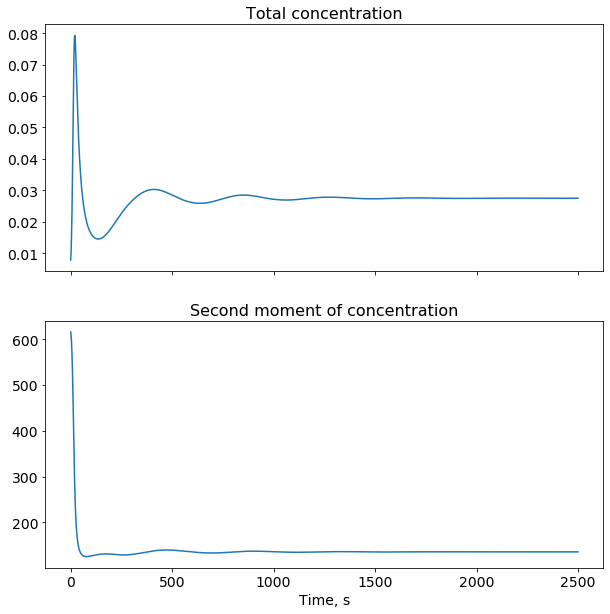

In [90]:
fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True)
ax[0].plot(ts, big_cons)
ax[0].set_title('Total concentration', fontsize=16)
ax[1].plot(ts, big_seconds)
ax[1].set_title('Second moment of concentration', fontsize=16)
ax[1].set_xlabel('Time, s', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].tick_params(axis='both', which='minor', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='minor', labelsize=14)

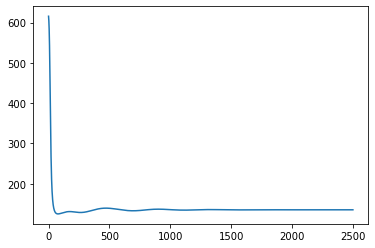

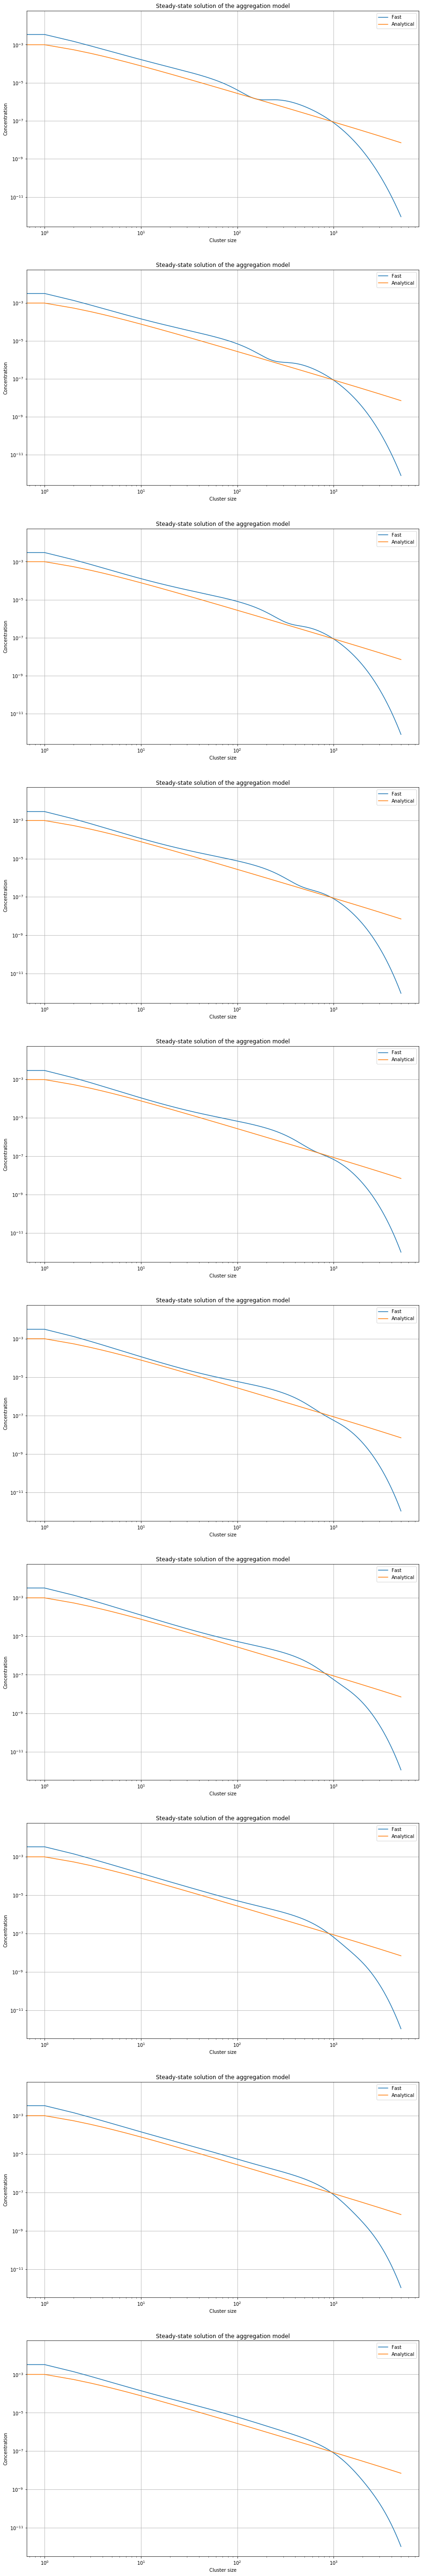

In [24]:
fig, axes = plt.subplots(10, figsize=(15, 10*10))
for i, ax in enumerate(axes):
    ax.loglog(big_results[-4000 + i*100][1:], label='Fast')
    ax.loglog(analytic_res, label='Analytical')
    ax.set_xlabel('Cluster size')
    ax.set_ylabel('Concentration')
    ax.legend()
    ax.grid()
    ax.set_title('Steady-state solution of the aggregation model')

In [1]:
print(len(big_results))

NameError: name 'big_results' is not defined

In [14]:
initializer = np.load('res_15000_a=0.1_dt=0.005_l=0.005.npy')

In [17]:
osc_big_sim = simulation.FastSimulation(num_equations=15000, dt=0.005, lmbda=0.005, alpha=0.7)
osc_big_sim.concentration = np.copy(initializer)
osc_big_cons =  []
osc_big_seconds = []
osc_big_firsts = []
osc_big_results = []

In [26]:
ts[:200]

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495., 500., 505., 510., 515., 520., 525., 530., 535., 540., 545.,
       550., 555., 560., 565., 570., 575., 580., 585., 590., 595., 600.,
       605., 610., 615., 620., 625., 630., 635., 640., 645., 650., 655.,
       660., 665., 670., 675., 680., 685., 690., 695., 700., 705., 710.,
       715., 720., 725., 730., 735., 740., 745., 75

In [18]:
num_iterations = 15000 * 100
num_iterations_per_step = 1000
num_steps = num_iterations // num_iterations_per_step
k = np.arange(0, 15001)
ksq = k**2
ts = np.arange(num_steps) * (osc_big_sim.dt * num_iterations_per_step)
start = time.time()
for i in range(num_steps):
    conc = osc_big_sim.run_simulation(num_iterations_per_step)
    osc_big_cons.append(np.sum(conc))
    osc_big_firsts.append(k @ conc)
    osc_big_seconds.append(ksq @ conc)
print(time.time() - start)

2401.7118268013


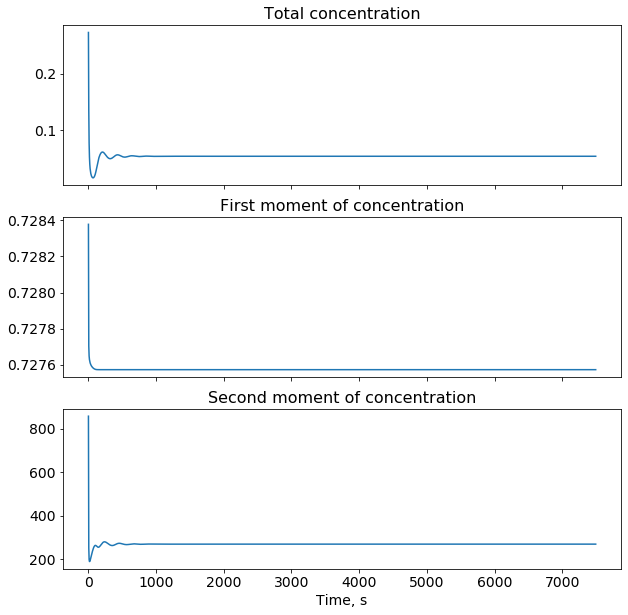

In [20]:
fig, ax = plt.subplots(3, figsize=(10, 10), sharex=True)
ax[0].plot(ts, osc_big_cons)
ax[0].set_title('Total concentration',fontsize=16)
ax[1].plot(ts, osc_big_firsts)
ax[1].set_title('First moment of concentration', fontsize=16)
ax[2].plot(ts, osc_big_seconds)
ax[2].set_title('Second moment of concentration', fontsize=16)


ax[2].set_xlabel('Time, s', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].tick_params(axis='both', which='minor', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='minor', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='minor', labelsize=14)

c:\program files\python 3.6\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


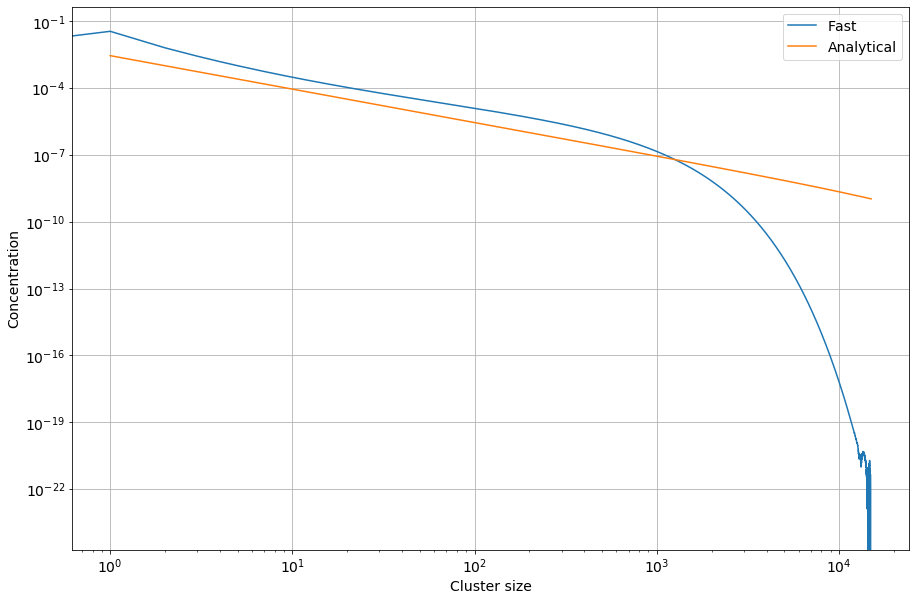

In [30]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.loglog(k, conc, label='Fast')
ax.loglog(k, analytical(k, 0.005), label='Analytical')
ax.set_xlabel('Cluster size', fontsize=14)
ax.set_ylabel('Concentration', fontsize=14)
ax.legend(fontsize=14)
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

In [31]:
osc_big_sim = simulation.FastSimulation(num_equations=15000, dt=0.005, lmbda=0.005, alpha=0.7)
osc_big_sim.concentration = np.copy(initializer)
osc_big_results = []

start = time.time()
for i in range(200):
    osc_big_results.append(np.copy(osc_big_sim.run_simulation(num_iterations_per_step)))
print(time.time() - start)

324.731858253479


c:\program files\python 3.6\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


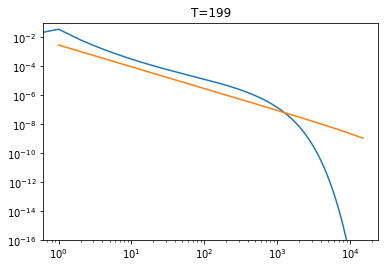

In [42]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = ax.loglog([], [])
ax.loglog(k, analytical(k, 0.005), label='Analytical')

def init():
#     ax.set_xlim(0, 100)
    ax.set_ylim(10**(-16), 10**(-1))
    return ln,

def update(frame):
    y = osc_big_results[frame]
    ln.set_data(k, y)
    ax.set_title('T=' + str(frame))
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(len(osc_big_results)), interval=30,
                    init_func=init, blit=True)
ani.save('initial.mp4', writer='ffmpeg')

c:\program files\python 3.6\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


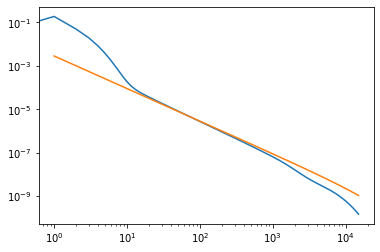

In [36]:
plt.loglog(k, osc_big_results[0])
plt.loglog(k, analytical(k, 0.005))

In [44]:
osc_big_sim = simulation.FastSimulation(num_equations=15000, dt=0.005, lmbda=0.005, alpha=0.7)
osc_big_sim.concentration = np.copy(initializer)
new_big_results = []

start = time.time()
for i in range(1000):
    new_big_results.append(np.copy(osc_big_sim.run_simulation(1)))
print(time.time() - start)

3.1240835189819336


In [45]:
new_big_results.extend(osc_big_results)

c:\program files\python 3.6\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


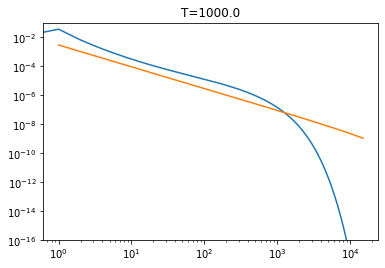

In [56]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = ax.loglog([], [])
ax.loglog(k, analytical(k, 0.005), label='Analytical')
frame_times = np.hstack([0.005 * np.arange(1000), ts[1:]])

def init():
#     ax.set_xlim(0, 100)
    ax.set_ylim(10**(-16), 10**(-1))
    return ln,

def update(frame):
    y = new_big_results[frame]
    ln.set_data(k, y)
    ax.set_title('T=' + str(frame_times[frame]))
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(len(new_big_results)), interval=30,
                    init_func=init, blit=True)
ani.save('initial_slower.mp4', writer='ffmpeg')

In [57]:
initializer @ k

0.7343428497837808

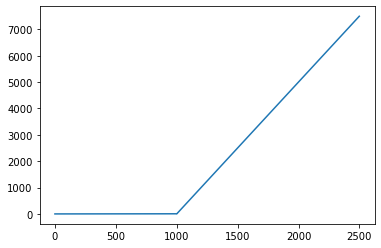